 # Домашняя работа №1

# Задача №2

Построить график зависимости термического КПД паротурбинного цикла без промежуточного перегрева пара при следующих параметрах пара:  P0= 5 MPa,  t0= 450 градусов Цельсия,  pk= 5, 10, 15, 20, 50 kPa. Принять давление за последней ступенью паровой турбины  p2=pk. Термический КПД цикла оценивать без учета подогрева воды в питательном насосе и регенеративной системе. 

In [1]:
import iapws
from iapws import IAPWS97 as gas
import matplotlib.pyplot as plt
import numpy as np

In [2]:
MPa = 10 ** 6
kPa = 10 ** 3
unit = 1 / MPa
to_kelvin = lambda x: x + 273.15 if x else None

In [14]:
# Начальные параметры:
p0 = 5 * MPa
 
t0 = to_kelvin(450)

pk =[5, 10, 15, 20, 50]
for i in range(len(pk)):
    pk[i] = pk[i] * kPa

In [16]:
# Определим точки, которые нам нужны
point_condenser_inlet = []
point_pump_outlet = []
point = (gas(P = p0 * unit, T = t0))
for j in range(len(pk)):
    point_condenser_inlet.append(gas(P = pk[j] * unit, s = point.s))
    point_pump_outlet.append(gas(P = pk[j] * unit, x = 0))

In [19]:
useful_energy = []
full_energy = []
efficiency = []
for j in range(len(pk)):
    useful_energy.append(point.h - point_condenser_inlet[j].h)
    full_energy.append(point.h - point_pump_outlet[j].h)
    efficiency.append(round(useful_energy[j]/full_energy[j]*100,3))

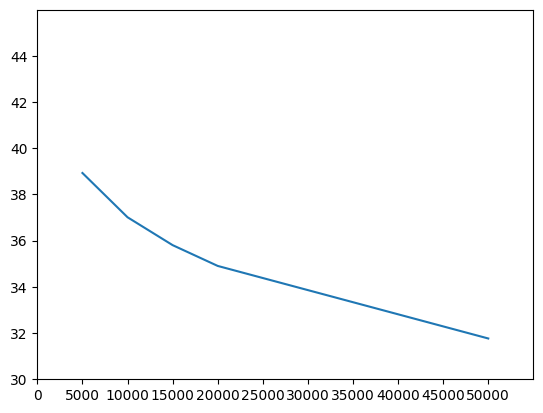

In [27]:
y = []
x = []
for j in range(len(pk)):
    y.append(efficiency[j])
    x.append(pk[j])
    
fig, ax = plt.subplots()

ax.plot(x, y,)

ax.set(xlim = (0 , 55 * kPa), xticks = np.arange(0, 55 * kPa, 5  * kPa, ),
        ylim = (30, 46), yticks = np.arange(30, 46, 2,))

plt.show()

In [24]:
for j in range(len(pk)):
    print("Значение КПД в точке",j+1,":",efficiency[j], "%" )

Значение КПД в точке 1 : 38.93 %
Значение КПД в точке 2 : 37.014 %
Значение КПД в точке 3 : 35.807 %
Значение КПД в точке 4 : 34.907 %
Значение КПД в точке 5 : 31.766 %
